✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-20 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: Engine 'cfradial1' loading failed:
cannot import name 'HybridMappingProxy' from 'xarray.core.utils' (/opt/anaconda3/lib/python3.12/site-packages/xarray/core/utils.py)
  external_backend_entrypoints = backends_dict_from_pkg(entrypoints_unique)
/opt/anaconda3/lib/python3.12/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: Engine 'datamet' loading failed:
cannot import name 'HybridMappingProxy' from 'xarray.core.utils' (/opt/anaconda3/lib/python3.12/site-packages/xarray/core/utils.py)
  external_backend_entrypoints = backends_dict_from_pkg(entrypoints_unique)
/opt/anaconda3/lib/python3.12/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: Engine 'furuno' loading failed:
cannot import name 'HybridMappingProxy' from 'xarray.core.utils' (/opt/anaconda3/lib/python3.12/site-packages/xarray/core/utils.py)
  external_backend_entrypoints = backends_dict_from_pkg(entrypoints_unique)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-20 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


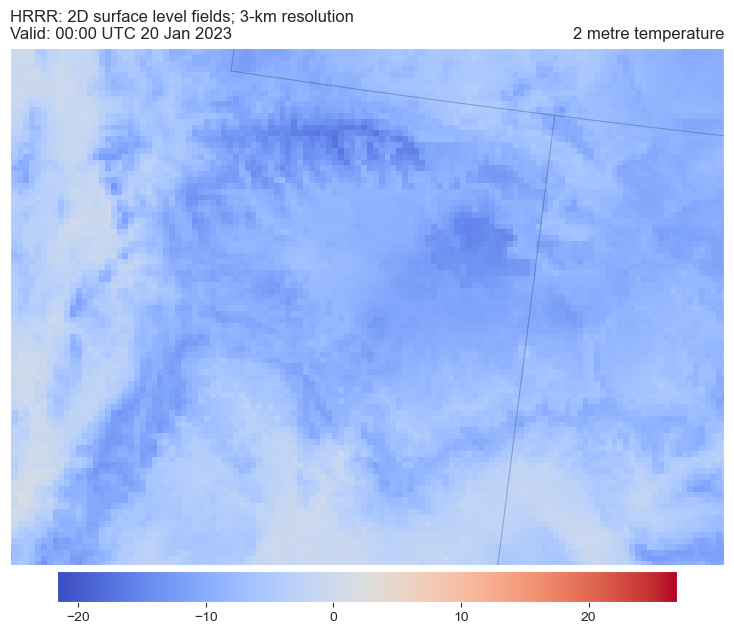

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jan-27 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jan-27 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


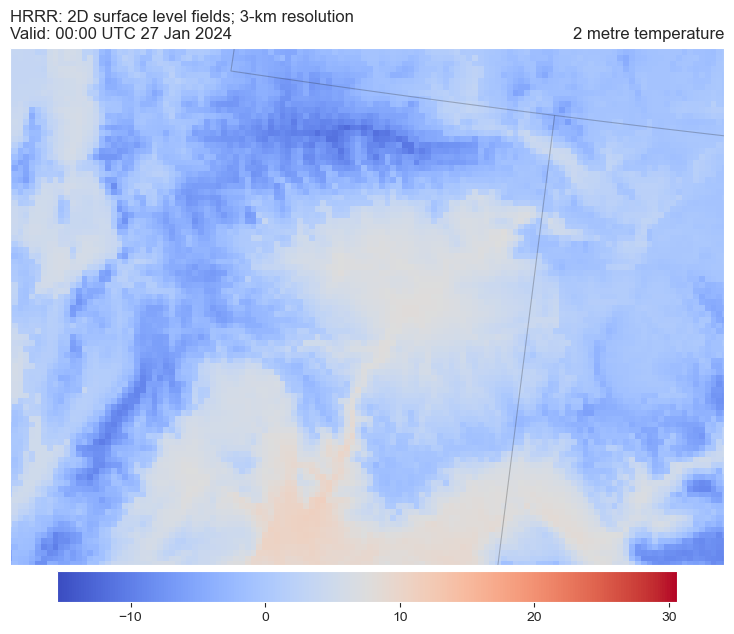

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jan-27 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jan-27 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


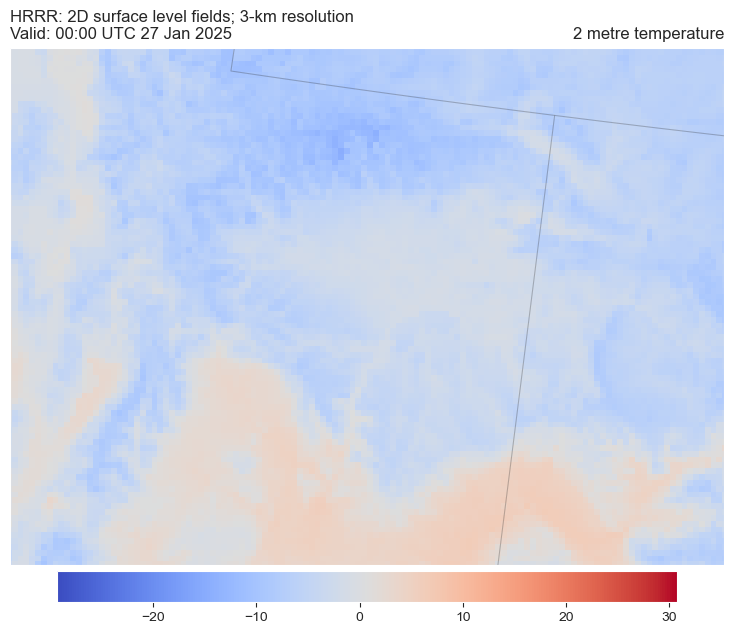

In [1]:
from herbie import Herbie
from herbie.toolbox import EasyMap, pc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

# Define your three time periods as (start, end) pairs
periods = [
    ("2023-01-20", "2023-01-27"),
    ("2024-01-27", "2024-03-05"),
    ("2025-01-27", "2025-02-12")
]

# Loop through each period – for this demo, we'll use the first day of each period
for start_date, end_date in periods:
    # Create a date range for the period and pick the first day
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    date_str = date_range[0].strftime('%Y-%m-%d')
    print(f"Downloading HRRR data for {date_str}...")

    # Initialize Herbie for the given date, HRRR model, surface product, forecast 00
    H = Herbie(date_str, model="hrrr", product="sfc", fxx=0)

    # Download and load the 2‑m temperature data
    ds = H.xarray("TMP:2 m above")

    if ds is None:
        print(f"No data found for {date_str}.")
        continue

    # Print the success message
    print(f"✅ Found ┊ model={H.model} ┊ product={H.product} ┊ {date_range[0].strftime('%Y-%b-%d')} 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws")

    # Set up the map using EasyMap (with borders and state lines)
    # Adjust extent to focus on the Uinta Basin: longitude [-112, -108], latitude [39, 41]
    ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 8]).BORDERS().STATES().ax
    ax.set_extent([-112, -108, 39, 41], ccrs.PlateCarree())

    # Plot the 2‑m temperature (converted from Kelvin to Celsius) with a standard colormap
    p = ax.pcolormesh(
        ds.longitude,
        ds.latitude,
        ds.t2m - 273.15,  # Kelvin to Celsius conversion
        transform=pc,
        cmap='coolwarm'
    )

    plt.colorbar(
        p,
        ax=ax,
        orientation="horizontal",
        pad=0.01,
        shrink=0.8
    )

    # Set titles on the left and right
    ax.set_title(
        f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
        loc="left",
    )
    ax.set_title("2 metre temperature", loc="right")

    plt.show()



Processing day: 2023-02-26
  Fetching forecast hour: 08
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Feb-26 00:00 UTC F08 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Fetching forecast hour: 09
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Feb-26 00:00 UTC F09 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Fetching forecast hour: 10
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Feb-26 00:00 UTC F10 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Fetching forecast hour: 11
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Feb-26 00:00 UTC F11 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Fetching forecast hour: 12
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Feb-26 00:00 UTC F12 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Fetching forecast hour: 13
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Feb-26 00:00 UTC F13 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Fetching forecast hour: 14
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Feb-26 00:00 UTC F14 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Basin average temperature (°C): -4.53


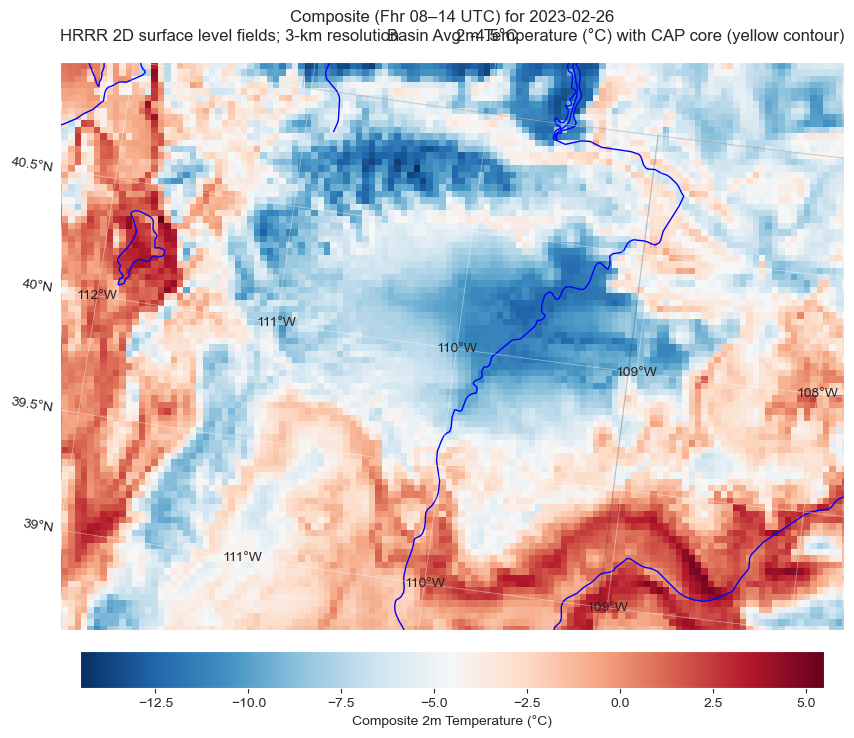


Processing day: 2024-03-04
  Fetching forecast hour: 08
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Mar-04 00:00 UTC F08 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Fetching forecast hour: 09
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Mar-04 00:00 UTC F09 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Fetching forecast hour: 10
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Mar-04 00:00 UTC F10 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Fetching forecast hour: 11
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Mar-04 00:00 UTC F11 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Fetching forecast hour: 12
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Mar-04 00:00 UTC F12 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Fetching forecast hour: 13
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Mar-04 00:00 UTC F13 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Fetching forecast hour: 14
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Mar-04 00:00 UTC F14 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Basin average temperature (°C): -9.66


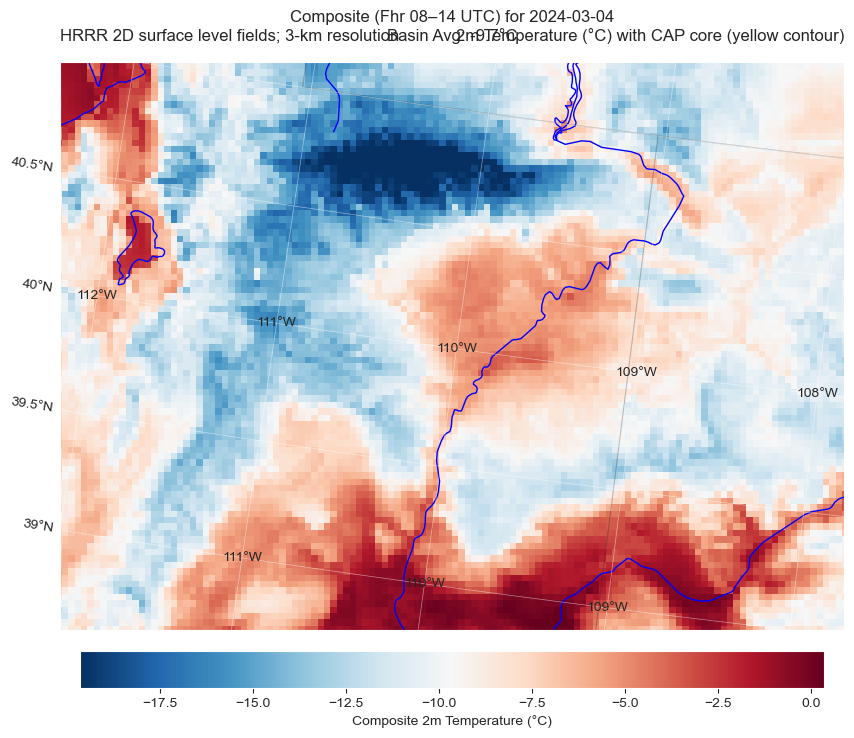


Processing day: 2025-02-01
  Fetching forecast hour: 08
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Feb-01 00:00 UTC F08 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Fetching forecast hour: 09
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Feb-01 00:00 UTC F09 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Fetching forecast hour: 10
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Feb-01 00:00 UTC F10 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Fetching forecast hour: 11
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Feb-01 00:00 UTC F11 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Fetching forecast hour: 12
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Feb-01 00:00 UTC F12 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Fetching forecast hour: 13
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Feb-01 00:00 UTC F13 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Fetching forecast hour: 14
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Feb-01 00:00 UTC F14 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


  Basin average temperature (°C): -1.84


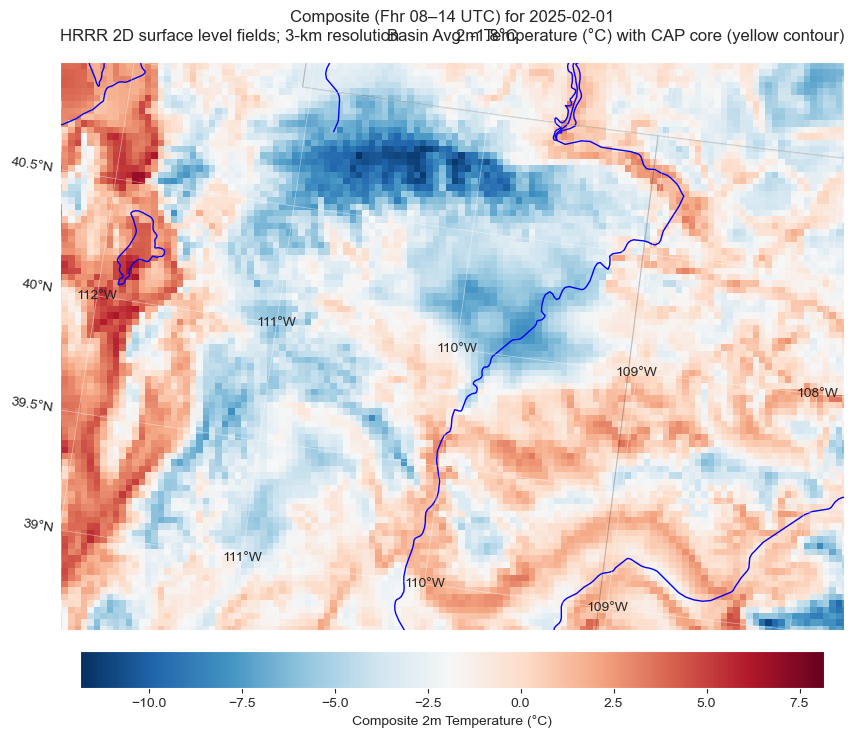

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from herbie import Herbie
from herbie.toolbox import EasyMap, pc

# Target days
target_days = [
    "2023-02-26",
    "2024-03-04",
    "2025-02-01"
]

fhr_range = range(8, 15)  # 01–07 MST => 08–14 UTC
output_dir = "composite_CAP_plots"
os.makedirs(output_dir, exist_ok=True)

for day in target_days:
    print(f"\nProcessing day: {day}")
    temp_list = []

    for fhr in fhr_range:
        print(f"  Fetching forecast hour: {fhr:02d}")
        H = Herbie(day, model="hrrr", product="sfc", fxx=fhr)
        ds = H.xarray("TMP:2 m above")
        if ds is None:
            print(f"    Data not available for {day} f{fhr:02d}")
            continue

        # Convert longitudes to [-180, 180]
        lon = ds.longitude
        lon_corrected = ((lon + 180) % 360) - 180
        ds = ds.assign_coords(longitude=lon_corrected)

        # Convert to Celsius
        temp_list.append(ds.t2m - 273.15)

    if not temp_list:
        print(f"No data for {day}. Skipping...")
        continue

    # Composite
    composite_temp = np.mean([t.values for t in temp_list], axis=0)
    ds0 = ds  # The last dataset we loaded
    # No second Kelvin->Celsius step here
    composite_da = ds0.t2m.copy(data=composite_temp)

    # Mask for Uinta Basin bounding box
    mask = (
        (ds0.longitude >= -112) & (ds0.longitude <= -108) &
        (ds0.latitude >= 39)    & (ds0.latitude <= 41)
    )
    basin_mean = composite_da.where(mask).mean().item()
    print(f"  Basin average temperature (°C): {basin_mean:.2f}")

    # Divergent color scale around basin mean
    vmin = basin_mean - 10
    vmax = basin_mean + 10
    cap_threshold = basin_mean - 15

    # Plot
    ax = EasyMap("50m", crs=ds0.herbie.crs, figsize=[12, 9]).BORDERS().STATES().ax
    ax.set_extent([-112, -108, 39, 41], ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, facecolor="lightgray", alpha=0.3)
    ax.add_feature(cfeature.LAKES, edgecolor="blue", facecolor="none")
    ax.add_feature(cfeature.RIVERS, edgecolor="blue", facecolor="none")

    p = ax.pcolormesh(
        ds0.longitude,
        ds0.latitude,
        composite_da,
        transform=pc,
        cmap="RdBu_r",
        shading="auto",
        vmin=vmin,
        vmax=vmax
    )

    # CAP core contour
    cs = ax.contour(
        ds0.longitude,
        ds0.latitude,
        composite_da,
        levels=[cap_threshold],
        colors="yellow",
        linewidths=2,
        transform=pc
    )
    ax.clabel(cs, inline=True, fontsize=10, fmt="CAP core: %.1f°C")

    cbar = plt.colorbar(p, ax=ax, orientation="horizontal", pad=0.03, shrink=0.8)
    cbar.set_label("Composite 2m Temperature (°C)")

    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color="white", alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False

    ax.set_title(f"{ds0.model.upper()} {H.product_description}", loc="left", pad=15)
    ax.set_title(f"Composite (Fhr 08–14 UTC) for {day}\nBasin Avg: {basin_mean:.1f}°C", loc="center", pad=15)
    ax.set_title("2m Temperature (°C) with CAP core (yellow contour)", loc="right", pad=15)

    outname = os.path.join(output_dir, f"{day}_composite_CAP.png")
    plt.savefig(outname, dpi=150, bbox_inches="tight")
    plt.show()
    plt.close()


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2021-Jan-25 06:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


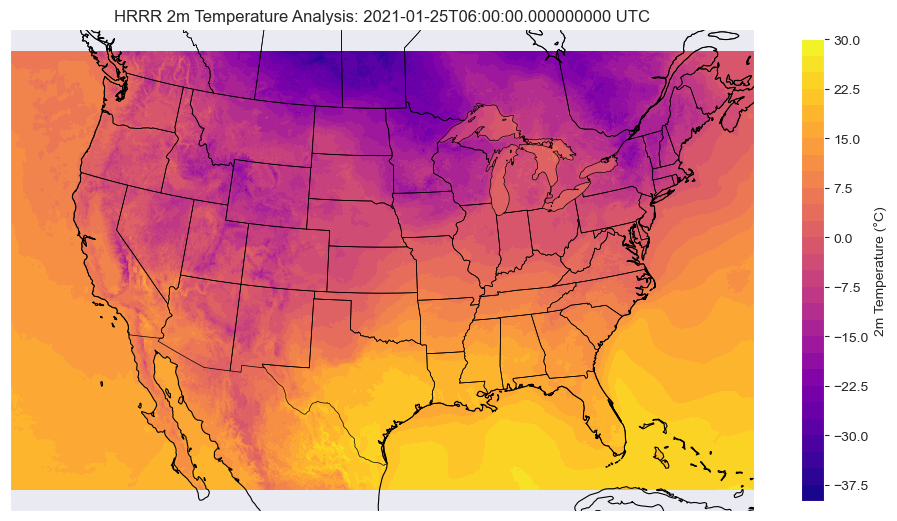

In [4]:
from herbie import Herbie
import metpy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature  # Use cartopy.feature for geographic features

# Initialize Herbie for HRRR surface analysis
h = Herbie("2021-01-25 06:00", model="hrrr", product="sfc", fxx=0)

# Extract the xarray dataset for the 2m temperature field.
ds = h.xarray("TMP:2 m")

# If both 'time' and 'valid_time' are present, drop the ambiguous 'time'
if 'time' in ds and 'valid_time' in ds:
    ds = ds.drop_vars('time')

# Parse CF metadata and assign proper 1D x/y coordinates
ds = ds.metpy.parse_cf().metpy.assign_y_x()

# Convert the CFProjection to a Cartopy CRS
cartopy_proj = ds.metpy_crs.item().to_cartopy()

# Create the plot with a single Axes
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': cartopy_proj})

# Add geographic context
ax.coastlines('50m', linewidth=0.8)
ax.add_feature(cfeature.STATES.with_scale('50m'),
               linewidth=0.5, edgecolor='black')

# Convert the 2m temperature from Kelvin to degrees Celsius
temp = ds['t2m'].metpy.convert_units('degC')

# Plot the temperature field using the assigned x and y coordinates
contour = ax.contourf(ds['x'].values, ds['y'].values, temp, levels=30,
                      cmap='plasma', transform=cartopy_proj)

plt.colorbar(contour, ax=ax, shrink=0.6).set_label('2m Temperature (°C)')
ax.set_title(f"HRRR 2m Temperature Analysis: {ds.valid_time.values} UTC")
plt.show()


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Feb-26 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


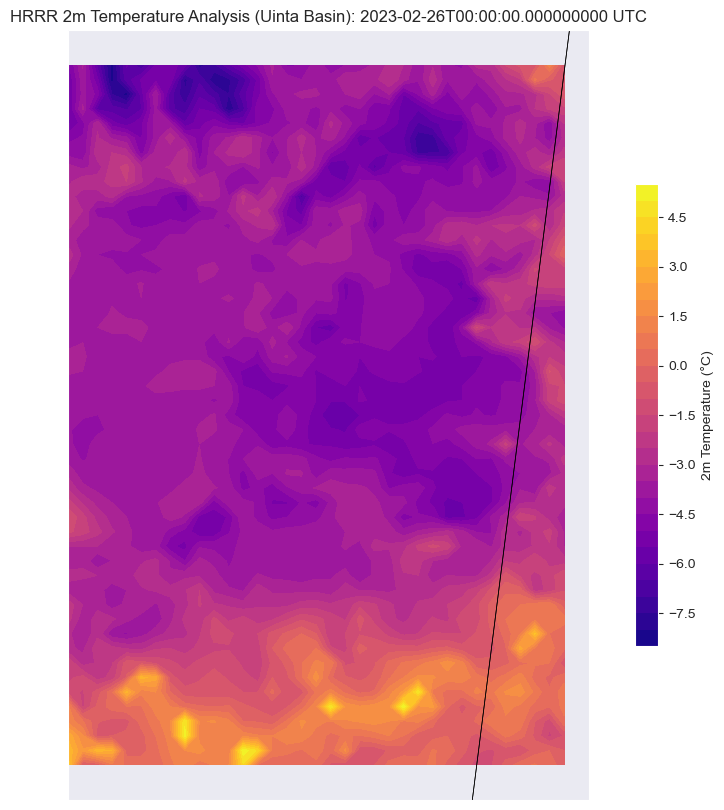

In [5]:
from herbie import Herbie
import metpy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pyproj

# Initialize Herbie for HRRR surface analysis for Feb 26, 2023
h = Herbie("2023-02-26 00:00", model="hrrr", product="sfc", fxx=0)

# Extract the xarray dataset for the 2m temperature field.
ds = h.xarray("TMP:2 m")

# Drop ambiguous 'time' coordinate if both 'time' and 'valid_time' exist.
if 'time' in ds and 'valid_time' in ds:
    ds = ds.drop_vars('time')

# Parse CF metadata and assign proper 1D x/y coordinates.
ds = ds.metpy.parse_cf().metpy.assign_y_x()

# Convert the CFProjection to a Cartopy CRS.
cartopy_proj = ds.metpy_crs.item().to_cartopy()

# Define Uinta Basin bounding box in geographic coordinates (lon, lat)
# Approximate bounds from Uintah County, Utah:
#   West: -110.05, East: -109.05, South: 39.45, North: 40.87
bbox = [-110.05, -109.05, 39.45, 40.87]

# Transform the geographic bounding box (EPSG:4326) to the dataset's native coordinates.
source_crs = pyproj.CRS("EPSG:4326")
target_crs = pyproj.CRS.from_cf(ds.metpy_crs.item().to_dict())
transformer = pyproj.Transformer.from_crs(source_crs, target_crs, always_xy=True)
x_min, y_min = transformer.transform(bbox[0], bbox[2])
x_max, y_max = transformer.transform(bbox[1], bbox[3])

# Subset the dataset to the Uinta Basin region.
ds_subset = ds.sel(x=slice(min(x_min, x_max), max(x_min, x_max)),
                   y=slice(min(y_min, y_max), max(y_min, y_max)))

# Convert the 2m temperature from Kelvin to degrees Celsius.
temp = ds_subset['t2m'].metpy.convert_units('degC')

# Create the plot with a single Axes using the dataset's projection.
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': cartopy_proj})

# Add geographic context.
ax.coastlines('50m', linewidth=0.8)
ax.add_feature(cfeature.STATES.with_scale('50m'),
               linewidth=0.5, edgecolor='black')

# Plot the temperature field using the assigned x and y coordinates.
contour = ax.contourf(ds_subset['x'].values, ds_subset['y'].values, temp, levels=30,
                      cmap='plasma', transform=cartopy_proj)

plt.colorbar(contour, ax=ax, shrink=0.6).set_label('2m Temperature (°C)')
ax.set_title(f"HRRR 2m Temperature Analysis (Uinta Basin): {ds.valid_time.values} UTC")
plt.show()


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Feb-26 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


/opt/anaconda3/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


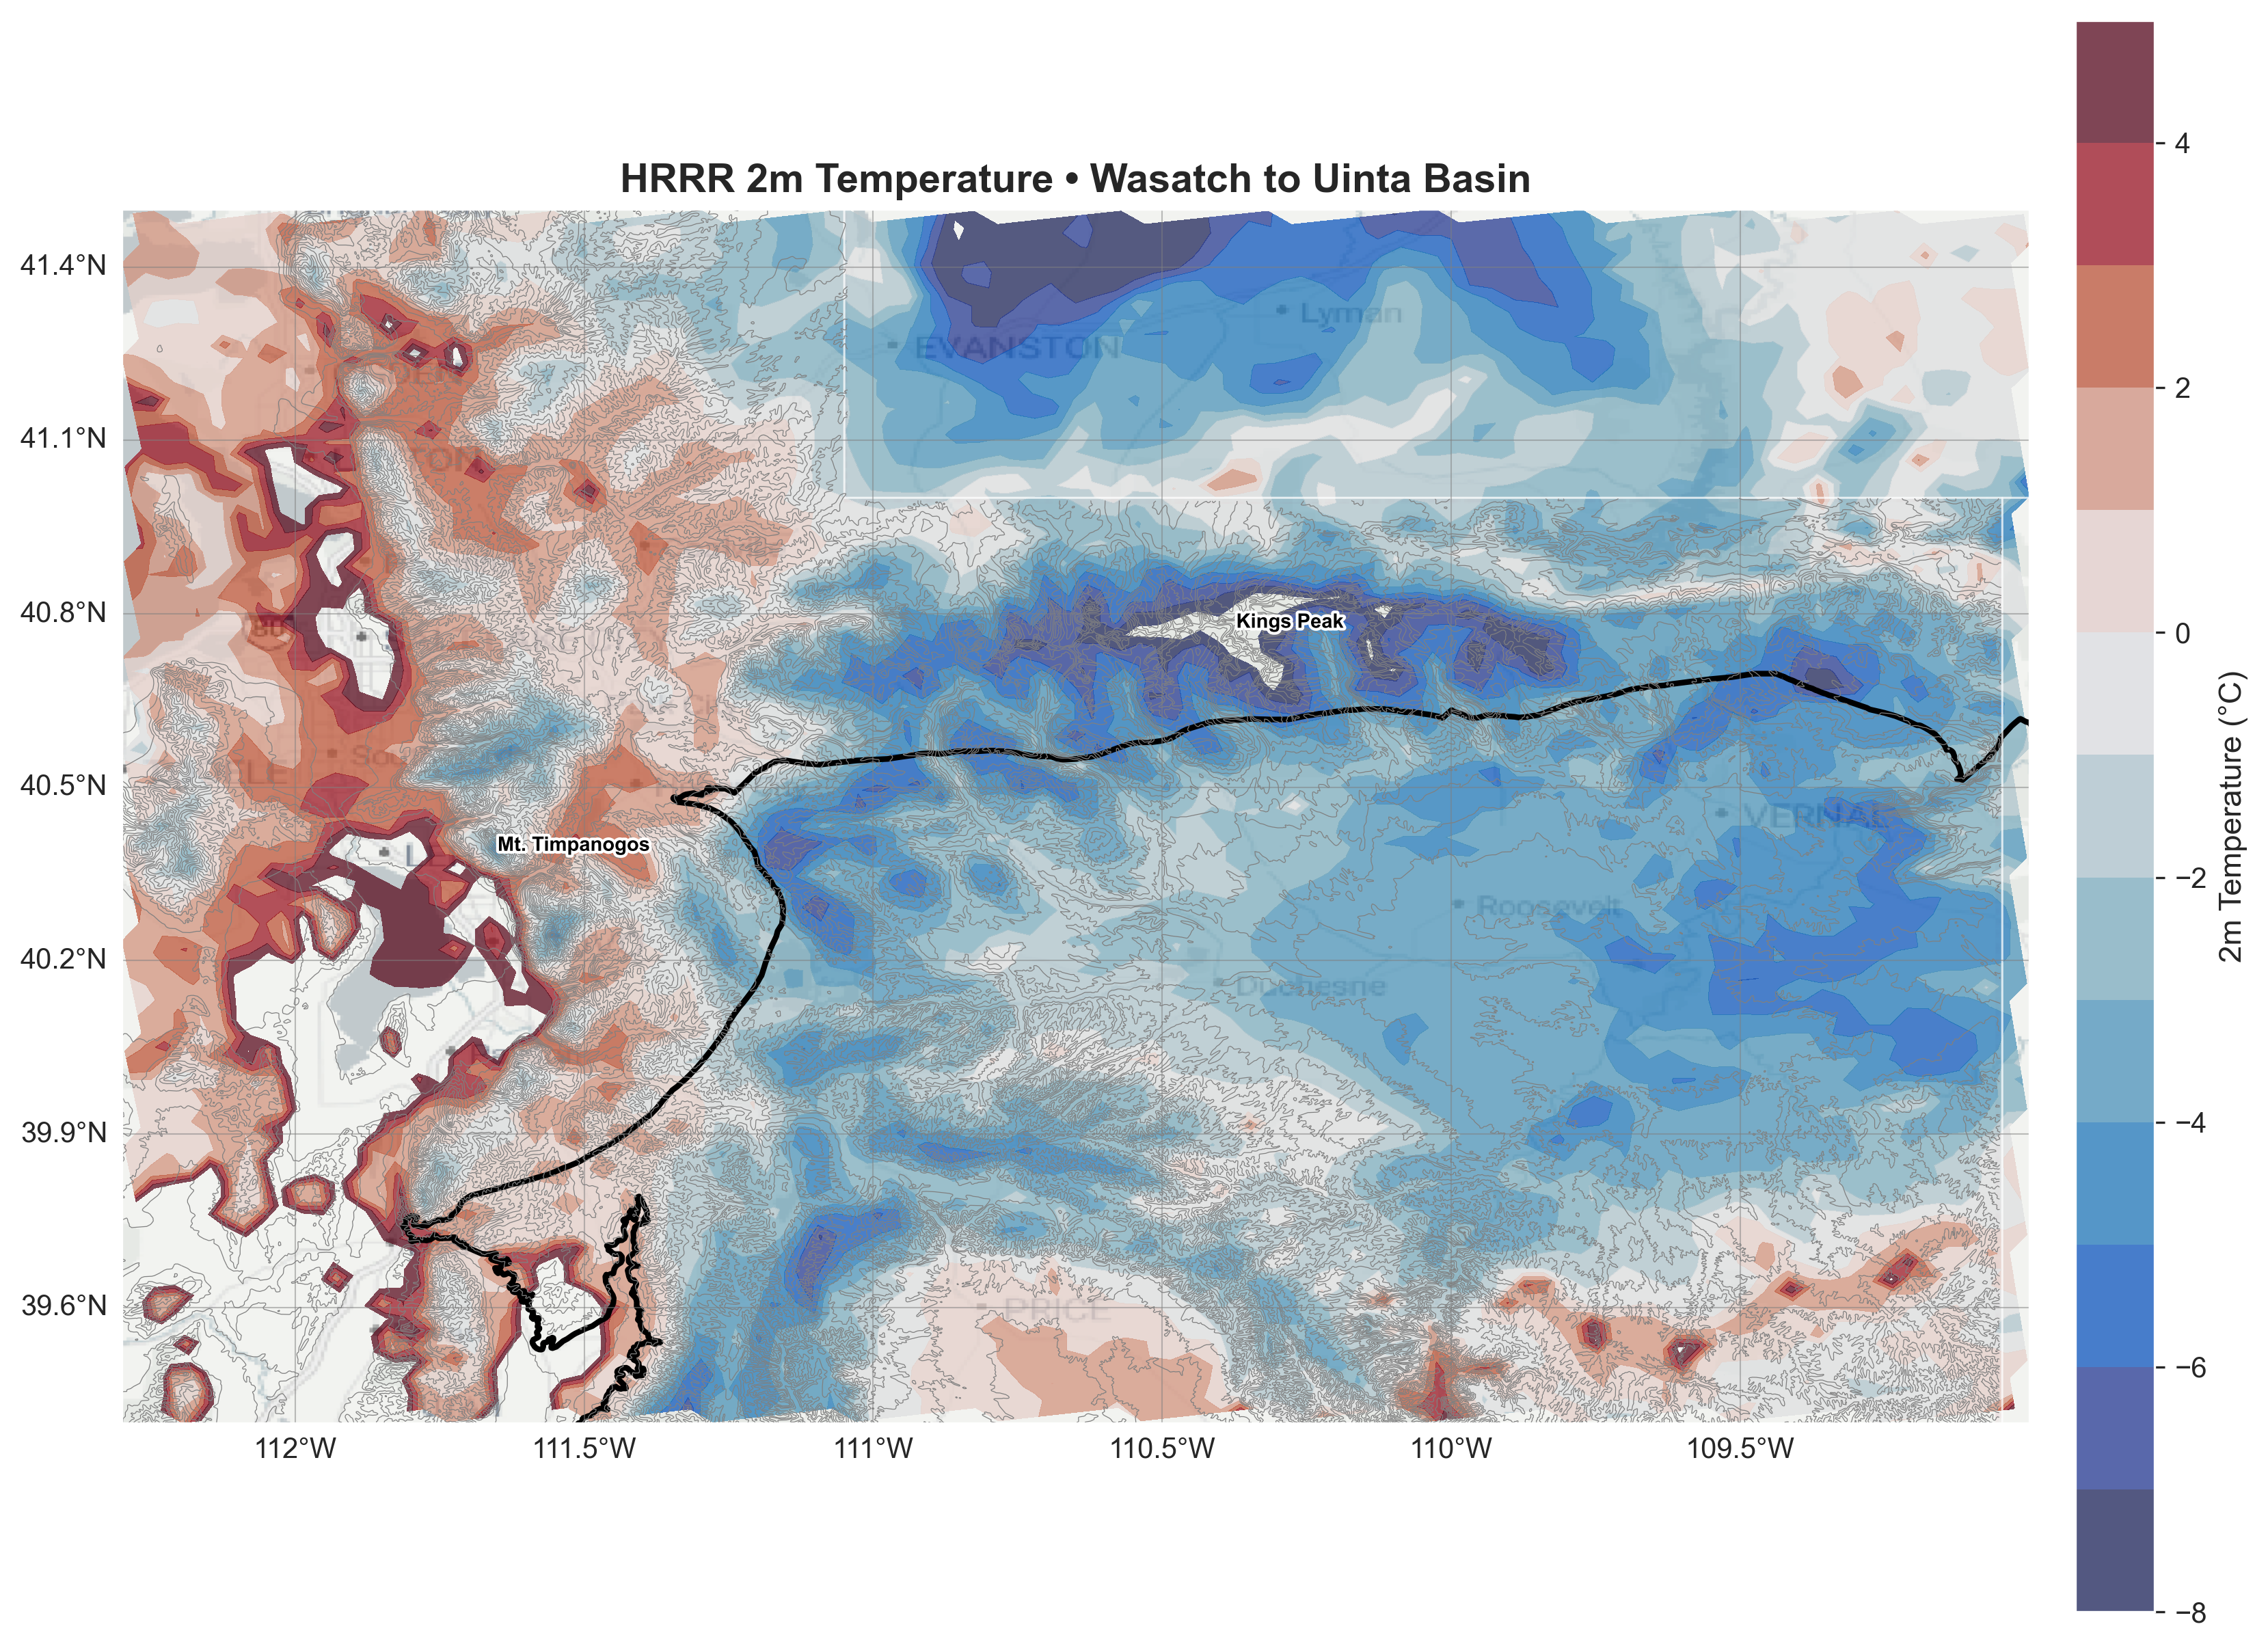

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.img_tiles as cimgt
import geopandas as gpd
import matplotlib.colors as mcolors  # For TwoSlopeNorm
import cmocean
import matplotlib.patheffects as PathEffects  # For outlining text

from herbie import Herbie
import metpy

# =============================================================================
# 1) Fetch HRRR Data
# =============================================================================
h = Herbie("2023-02-26 00:00", model="hrrr", product="sfc", fxx=0)
ds = h.xarray("TMP:2 m")
if 'time' in ds and 'valid_time' in ds:
    ds = ds.drop_vars('time')
ds = ds.metpy.parse_cf().metpy.assign_y_x()
native_crs = ds.metpy_crs.item().to_cartopy()

# =============================================================================
# 2) Convert from Native Grid to Lat/Lon
# =============================================================================
plot_crs = ccrs.PlateCarree()
x2d, y2d = np.meshgrid(ds.x, ds.y)
lonlat = plot_crs.transform_points(native_crs, x2d, y2d)
lon2d = lonlat[..., 0]
lat2d = lonlat[..., 1]

# Convert from Kelvin to Celsius
t2m_c = ds['t2m'].metpy.convert_units('degC')

# =============================================================================
# 3) Refine Bounding Box (Wasatch -> Uinta Basin, excluding extra WY/CO)
# =============================================================================
min_lon, max_lon = -112.3, -109.0
min_lat, max_lat = 39.4, 41.5

mask = ((lon2d >= min_lon) & (lon2d <= max_lon) &
        (lat2d >= min_lat) & (lat2d <= max_lat))

lon2d_sub = np.where(mask, lon2d, np.nan)
lat2d_sub = np.where(mask, lat2d, np.nan)
t2m_sub    = np.where(mask, t2m_c, np.nan)

# =============================================================================
# 4) Set up the Figure with a Stadia Background
# =============================================================================
fig = plt.figure(figsize=(12, 10), dpi=300)
ax = plt.subplot(1, 1, 1, projection=plot_crs)

# Use StadiaMapsTiles with your API key and style 'alidade_smooth'
tiler = cimgt.StadiaMapsTiles(apikey='YOUR_API_HERE', style='alidade_smooth')
ax.add_image(tiler, 8)  # Zoom level 8

# =============================================================================
# 5) Plot the Temperature Data
# =============================================================================
levels = np.arange(-8, 6, 1)
norm = mcolors.TwoSlopeNorm(vmin=-8, vcenter=0, vmax=5)

contour = ax.contourf(
    lon2d_sub, lat2d_sub, t2m_sub,
    levels=levels, cmap=cmocean.cm.balance, norm=norm,
    alpha=0.75,  # partial transparency so background shows through
    transform=plot_crs
)
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', shrink=0.8, pad=0.02)
cbar.set_label("2m Temperature (°C)", fontsize=11)

ax.set_title("HRRR 2m Temperature • Wasatch to Uinta Basin", fontsize=14, fontweight='bold')
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=plot_crs)

ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='white', linewidth=0.7, alpha=0.5)

gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# =============================================================================
# 6) Overlay Shapefiles: 500-ft Contours & Uinta Basin Boundary (Black)
# =============================================================================
# A) 500-ft Contours
contours_shp = "/Users/a02428741/PycharmProjects/snowshadow/notebooks/shps/Contours500Ft/Contours500Ft.shp"
gdf_contours = gpd.read_file(contours_shp)
if gdf_contours.crs and gdf_contours.crs.to_string() != "EPSG:4326":
    gdf_contours = gdf_contours.to_crs(epsg=4326)
gdf_contours.plot(ax=ax, edgecolor='gray', facecolor='none', linewidth=0.3, transform=plot_crs)

# B) Uinta Basin Boundary (black)
uinta_shp = "/Users/a02428741/PycharmProjects/snowshadow/notebooks/shps/UintaBasin/pr20bndg.shp"
gdf_uinta = gpd.read_file(uinta_shp)
if gdf_uinta.crs and gdf_uinta.crs.to_string() != "EPSG:4326":
    gdf_uinta = gdf_uinta.to_crs(epsg=4326)
gdf_uinta.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=2, transform=plot_crs)

# =============================================================================
# 7) Label Key Peaks with White Outline on Black Text
# =============================================================================
# Mt. Timpanogos (~-111.65, 40.39)
text1 = ax.text(
    -111.65, 40.39, "Mt. Timpanogos",
    transform=plot_crs,
    fontsize=7, color='black', fontweight='bold'
)
text1.set_path_effects([PathEffects.withStroke(linewidth=2, foreground="white")])

# Kings Peak (~-110.372, 40.776)
text2 = ax.text(
    -110.372, 40.776, "Kings Peak",
    transform=plot_crs,
    fontsize=7, color='black', fontweight='bold'
)
text2.set_path_effects([PathEffects.withStroke(linewidth=2, foreground="white")])

plt.tight_layout()
plt.savefig("Wasatch_Uinta_BlackOutline_BlackText_Stadia.png", dpi=300)
plt.show()
